In [1]:
!pip install sklearn

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
random_data = np.random.random((20, 2))

In [6]:
random_data

array([[0.01326001, 0.18887543],
       [0.60088791, 0.75076248],
       [0.20051177, 0.28594804],
       [0.27760572, 0.95518012],
       [0.16098343, 0.52663242],
       [0.48248154, 0.05981217],
       [0.35311615, 0.587312  ],
       [0.6119014 , 0.01036343],
       [0.20977147, 0.66336017],
       [0.40421249, 0.61264412],
       [0.13068502, 0.37489205],
       [0.40149736, 0.21227235],
       [0.30716737, 0.08288948],
       [0.18876049, 0.94969074],
       [0.31772957, 0.12761719],
       [0.77960334, 0.18390499],
       [0.23398955, 0.67474927],
       [0.20659162, 0.59754677],
       [0.3675548 , 0.43484142],
       [0.12513458, 0.10391799]])

In [7]:
import matplotlib.pyplot as plt

In [8]:
X = random_data[:, 0]

In [9]:
y = random_data[:, 1]

In [10]:
import random

In [11]:
def assmuing_function(x):
    # 在我们的日常生活中常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)

In [12]:
y = [assmuing_function(x) for x in X]

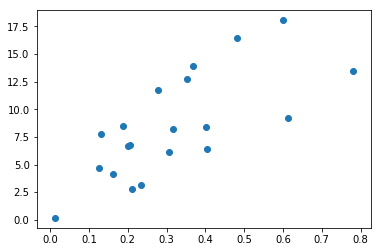

In [13]:
plt.scatter(X, y)

In [14]:
y = np.array(y)

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [17]:
reg.score(X.reshape(-1, 1), y)

0.5241854384534015

In [18]:
reg.coef_

array([17.98222211])

In [19]:
reg.intercept_

2.739772836149542

In [20]:
def f(x):
    return reg.coef_ * x + reg.intercept_

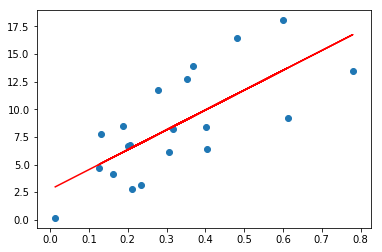

In [21]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

## How to implement a KNN model 

In [22]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [23]:
from scipy.spatial.distance import cosine

In [24]:
def distance(x1, x2):
    return cosine(x1, x2)

In [25]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    # 已经获得了最相似的数据集
    # 然后呢， Counter() -> most_common() -> 就可以获得出现最多的这个y了

## How to implement a Decision Tree 

In [26]:
from collections import Counter

# 信息熵

$$ Entropy = -\sum_i^n pr(x_i) log(pr(x_i)) $$

In [27]:
from icecream import ic

In [28]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [29]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [30]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [31]:
entropy([1, 1, 1, 0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [32]:
entropy([1, 2, 2, 2])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [33]:
entropy([2, 3, 3, 3])

ic| probs: [0.25, 0.75]


0.5623351446188083

## 决策树怎么来决定，哪一个特征来进行分割呢？ 

In [38]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [39]:
import pandas as pd

In [40]:
dataset = pd.DataFrame.from_dict(mock_data)

In [41]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [49]:
set(mock_data['family_number'])


{1, 2}

In [50]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [51]:
sub_split_1

[1, 1, 0, 0, 0]

In [58]:
sub_split_2

[1, 1]

In [57]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [60]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

In [61]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [62]:
_sub_split_1

[0, 0, 1]

In [63]:
_sub_split_2

[1, 1, 1, 0]

In [66]:
entropy(_sub_split_1) + entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

In [65]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [67]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [68]:
from icecream import ic

In [78]:
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [79]:
find_the_min_spilter(dataset, 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| pro

spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


('income', '-10')

In [80]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [81]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [82]:
find_the_min_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: 

spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [83]:
sub_df = dataset[dataset['family_number'] == 1]

In [84]:
sub_df[sub_df['gender'] == 'M']

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0


In [85]:
sub_df[sub_df['gender'] != 'M']

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0


In [86]:
find_the_min_spilter(sub_df[sub_df['gender'] != 'M'], 'bought')

ic| f: 'gender'
ic| values: {'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453


spliter is: ('family_number', 1)
the min entropy is: 0.6365141682948128


('family_number', 1)

## A simple example of kmeans 

In [87]:
from sklearn.cluster import KMeans

In [88]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

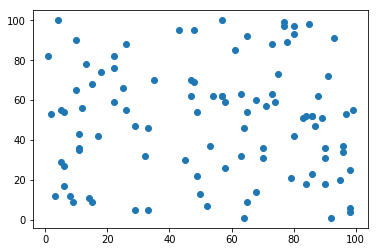

In [89]:
plt.scatter(X, Y)

In [90]:
tranning_data = [[x,y] for x, y in zip(X, Y)]

In [91]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [92]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
cluster.cluster_centers_

array([[15.94736842, 69.36842105],
       [90.        , 47.        ],
       [73.94444444, 16.77777778],
       [70.85714286, 92.28571429],
       [57.        , 56.38888889],
       [14.        , 21.6       ]])

In [95]:
cluster.labels_

array([5, 4, 2, 3, 3, 2, 1, 5, 1, 5, 2, 0, 1, 4, 1, 2, 2, 1, 5, 1, 1, 4,
       0, 4, 4, 0, 4, 0, 2, 0, 5, 0, 3, 2, 3, 2, 1, 1, 0, 5, 5, 4, 5, 0,
       1, 5, 4, 2, 2, 0, 1, 3, 5, 4, 2, 2, 4, 3, 0, 0, 4, 4, 1, 3, 5, 0,
       4, 5, 3, 0, 4, 1, 2, 1, 2, 1, 3, 3, 5, 3, 4, 2, 3, 3, 4, 2, 0, 0,
       0, 5, 5, 1, 2, 0, 3, 4, 4, 0, 0, 2], dtype=int32)

In [96]:
from collections import defaultdict

In [97]:
centers = defaultdict(list)

In [100]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

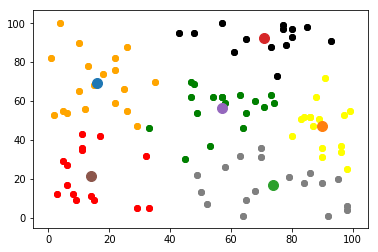

In [102]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])

for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)